In [1]:
#   1) Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)


In [3]:
#   2) Carga del dataset
data = pd.read_csv(r"C:/Users/cecil/Downloads/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#   3) Separación variables
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [5]:
#   4) Preprocesamiento
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)


In [6]:
#   5) División Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [7]:
#   6) Entrenamiento modelo base
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy modelo base:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy modelo base: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



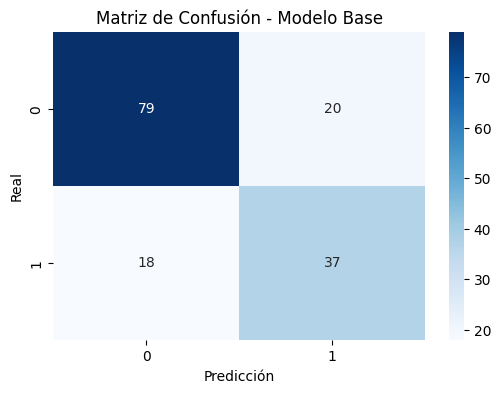

In [8]:
#   7) Matriz de confusión (base)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Modelo Base")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [9]:
#   8) Optimización con RandomizedSearchCV
param_dist = {
    "C": np.logspace(-3, 3, 20),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

search = RandomizedSearchCV(
    LogisticRegression(max_iter=500),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42,
    scoring="accuracy"
)

search.fit(X_train, y_train)

print("Mejores parámetros:", search.best_params_)

Mejores parámetros: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.1623776739188721)}


In [10]:
#   9) Modelo final optimizado
best_model = search.best_estimator_
y_pred_opt = best_model.predict(X_test)

print("Accuracy modelo optimizado:", accuracy_score(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))


Accuracy modelo optimizado: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



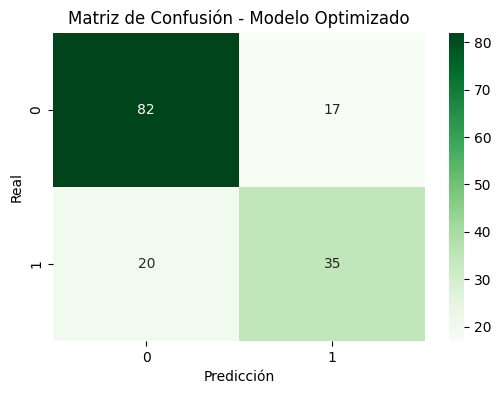

In [11]:
#   10) Matriz de confusión optimizada
cm_opt = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_opt, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


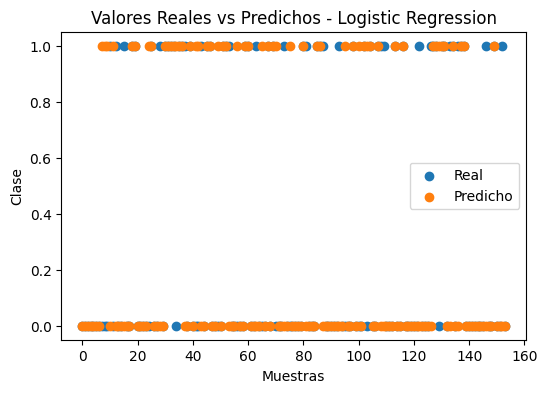

In [12]:
#   11) Gráfica: Reales vs Predichos
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label="Real")
plt.scatter(range(len(y_pred_opt)), y_pred_opt, label="Predicho")
plt.title("Valores Reales vs Predichos - Logistic Regression")
plt.xlabel("Muestras")
plt.ylabel("Clase")
plt.legend()
plt.show()


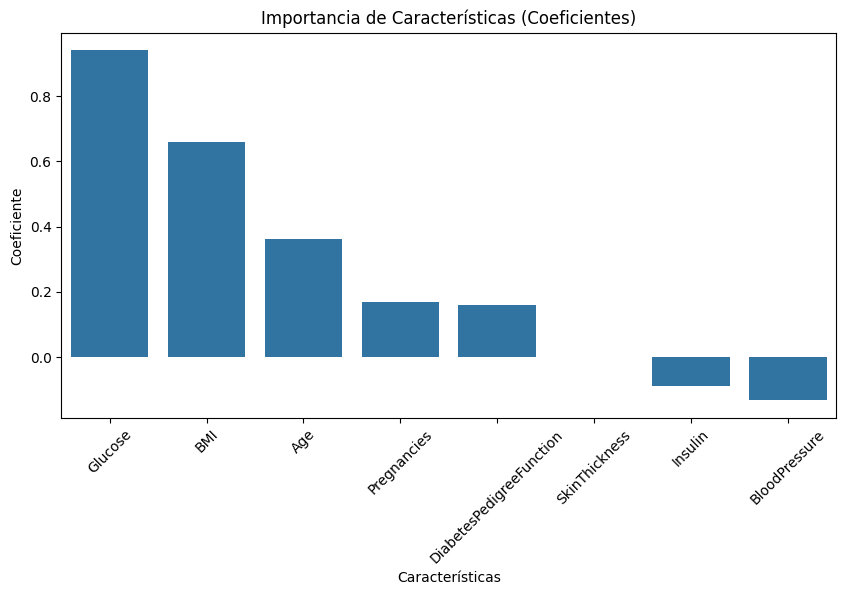

In [13]:
#   12) Importancia de características
coef = best_model.coef_[0]
feature_importance = pd.DataFrame({
    "Características": X.columns,
    "Coeficiente": coef
})

feature_importance = feature_importance.sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=feature_importance, x="Características", y="Coeficiente")
plt.title("Importancia de Características (Coeficientes)")
plt.xticks(rotation=45)
plt.show()